In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install -qq google_play_scraper
!pip install -q transformers

In [3]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [4]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
datalink = reviews_all('com.Elrufaidatalink.msorgdev',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [5]:
datalink

[{'reviewId': 'c7ecfc4d-8cab-4211-b0a9-d268ee33414b',
  'userName': 'Yahya Aliyu Inuwa',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWJD_baOqdxiv0R9hu0b6M0CU-amESHunSr98cCwjCOELWAz5o',
  'content': 'this is app are problems',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 18, 11, 46, 22),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.0'},
 {'reviewId': 'f538c686-96d9-4aaa-98fd-96af2a172fda',
  'userName': 'MURTALA MAI JAMAA',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocKksfUKLnc8jvKqWe16l1XIqmzIvz_EA5APxrngLzZrlIf0Sw=mo',
  'content': 'Good app',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 18, 11, 0, 31),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.0'},
 {'reviewId': '7701baee-3b97-4608-90a7-a8e049413921',
  'userName': 'Mamman Musa',
  'userImage': 'https://play-lh.googleusercontent.com

In [6]:
# convert the json data into a dataframe
datalink_df = pd.json_normalize(datalink)

In [7]:
datalink_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c7ecfc4d-8cab-4211-b0a9-d268ee33414b,Yahya Aliyu Inuwa,https://play-lh.googleusercontent.com/a-/ALV-U...,this is app are problems,5,0,1.0.0,2024-12-18 11:46:22,None,None,1.0.0
1,f538c686-96d9-4aaa-98fd-96af2a172fda,MURTALA MAI JAMAA,https://play-lh.googleusercontent.com/a/ACg8oc...,Good app,5,0,1.0.0,2024-12-18 11:00:31,None,None,1.0.0
2,7701baee-3b97-4608-90a7-a8e049413921,Mamman Musa,https://play-lh.googleusercontent.com/a/ACg8oc...,mammanMusa,4,0,1.0.0,2024-12-18 08:53:27,None,None,1.0.0
3,a788b265-cdfa-4c07-a500-a72f3e6f22ba,YAKUBU NUHU ABDULAZEEZ,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst app to use ever....... Nothing But Scam,1,0,1.0.0,2024-12-18 08:09:03,None,None,1.0.0
4,331b220b-7f2f-4407-9d30-502db230d536,Fatima Abubakar,https://play-lh.googleusercontent.com/a/ACg8oc...,Best app,5,0,None,2024-12-07 10:11:13,None,None,None


In [8]:
datalink_df.shape

(85, 11)

# Sentiment Analysis

In [9]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"

save_path = "C:\\Users\\Administrator\\Desktop\\DSFP\\LMS\\Module 7\\ETL ELT with python and mysql Assignment"  # Directory to save the model





In [10]:
#pip install tensorflow --timeout=120


In [11]:
#pip install torch --timeout=120

In [12]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)



Device set to use cpu
Device set to use cpu


In [13]:
# Test the reused model 
# play with the parameter and see if it works

result = sentiment_analysis_reuse("I am happy with this app")
print(result)

[{'label': 'POSITIVE', 'score': 0.9989145994186401}]


In [14]:
#removing wildcharacter and cleaning the content column by casting to a str
datalink_df['content_new']= datalink_df['content'].astype('str')

In [15]:
datalink_df['result'] =datalink_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [16]:
datalink_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,c7ecfc4d-8cab-4211-b0a9-d268ee33414b,Yahya Aliyu Inuwa,https://play-lh.googleusercontent.com/a-/ALV-U...,this is app are problems,5,0,1.0.0,2024-12-18 11:46:22,None,None,1.0.0,this is app are problems,"[{'label': 'NEGATIVE', 'score': 0.998276233673..."
1,f538c686-96d9-4aaa-98fd-96af2a172fda,MURTALA MAI JAMAA,https://play-lh.googleusercontent.com/a/ACg8oc...,Good app,5,0,1.0.0,2024-12-18 11:00:31,None,None,1.0.0,Good app,"[{'label': 'POSITIVE', 'score': 0.998726308345..."
2,7701baee-3b97-4608-90a7-a8e049413921,Mamman Musa,https://play-lh.googleusercontent.com/a/ACg8oc...,mammanMusa,4,0,1.0.0,2024-12-18 08:53:27,None,None,1.0.0,mammanMusa,"[{'label': 'POSITIVE', 'score': 0.579539716243..."
3,a788b265-cdfa-4c07-a500-a72f3e6f22ba,YAKUBU NUHU ABDULAZEEZ,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst app to use ever....... Nothing But Scam,1,0,1.0.0,2024-12-18 08:09:03,None,None,1.0.0,Worst app to use ever....... Nothing But Scam,"[{'label': 'NEGATIVE', 'score': 0.999498367309..."
4,331b220b-7f2f-4407-9d30-502db230d536,Fatima Abubakar,https://play-lh.googleusercontent.com/a/ACg8oc...,Best app,5,0,None,2024-12-07 10:11:13,None,None,None,Best app,"[{'label': 'POSITIVE', 'score': 0.998151600360..."


In [17]:
# spliting the result into sentiment and score
datalink_df['sentiment'] = datalink_df['result'].apply(lambda x: (x[0]['label']))
datalink_df['score'] = datalink_df['result'].apply(lambda x: (x[0]['score']))

In [18]:
datalink_df[['content','score','sentiment']]

,content,score,sentiment
0,this is app are problems,0.998276,NEGATIVE
1,Good app,0.998726,POSITIVE
2,mammanMusa,0.579540,POSITIVE
3,Worst app to use ever....... Nothing But Scam,0.999498,NEGATIVE
4,Best app,0.998152,POSITIVE
...,...,...,...
80,Nice app,0.998574,POSITIVE
81,Cheap and affordable Data. 👍,0.998838,POSITIVE
82,It's good application for data purchase,0.998648,POSITIVE
83,This very good update... That's why elrufaidal...,0.998829,POSITIVE


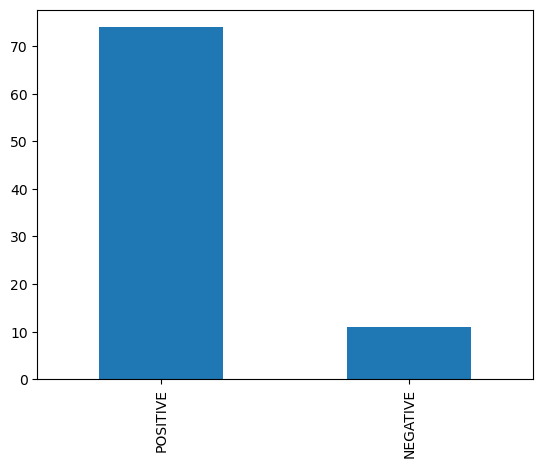

In [19]:
datalink_df['sentiment'].value_counts().plot(kind='bar');

# Topic modeling

In [20]:
#generate a series for the reviews
feature_google=datalink_df['content']
print(feature_google.size)
feature_google.head()

85


0                         this is app are problems
1                                         Good app
2                                       mammanMusa
3    Worst app to use ever....... Nothing But Scam
4                                         Best app
Name: content, dtype: object

In [21]:
#pip install textblob


In [22]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())

0                         this is app are problems
1                                         Good app
2                                       mammanMusa
3    Worst app to use ever....... Nothing But Scam
4                                         Best app
Name: content, dtype: object


In [23]:
pip install bertopic --default-timeout=100


Note: you may need to restart the kernel to use updated packages.


In [24]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

#Configure the embedding model with a longer timeout
embedding_model = SentenceTransformer("all-MiniLM-L6-v2", cache_folder="./models")

# Initialize the BERTopic model with the custom embedding model
topic_model = BERTopic(embedding_model=embedding_model)

# Fit the BERTopic model to your data
topics, probs = topic_model.fit_transform(feature_google.astype(str))


In [25]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,0,56,0_app_good_data_very,"[app, good, data, very, and, is, best, the, it...","[Very Affordable prices and easy to use, The b..."
1,1,15,1_review_view_fantastic_,"[review, view, fantastic, , , , , , , ]","[Review, Review, review]"
2,2,14,2_allah_masha_wannan_rufai,"[allah, masha, wannan, rufai, app, ahamdulilla...","[Masha Allah, Masha Allah, Masha Allah]"


In [26]:
datalink_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [27]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
datalink_df.to_excel(output_file, index=False)

In [28]:
pip install mysql-connector-python --upgrade --timeout 120


Note: you may need to restart the kernel to use updated packages.


# ETL code

In [29]:
dataframe=datalink_df

In [30]:
data = [tuple(row) for row in datalink_df.to_numpy()]

In [31]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [32]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [33]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [ ]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'fanitni836',
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


In [ ]:
df = pd.read_excel('playstore_reviews.xlsx')